#### К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
#### К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.
#### Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 4 (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=1
)

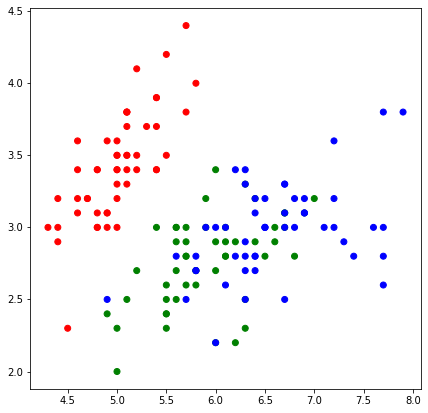

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):

    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [6]:
def knn_w_i(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            # + ресчет веса по принципу w= 1/i
            if i != 0:
                w = 1/i
                distance = w * e_metrics(x, x_train[i])
            else:
                distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
k = 1

y_pred = knn_w_i(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.733


In [9]:
def get_graph_w_i(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_w_i(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

<ipython-input-9-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


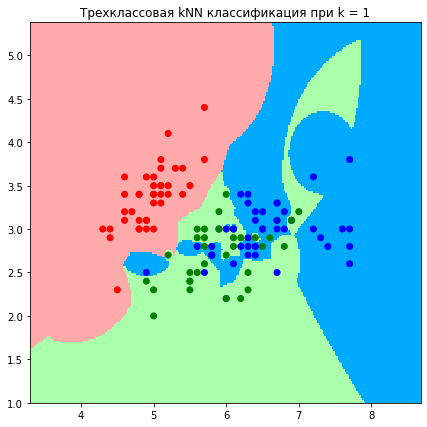

In [10]:
get_graph_w_i(X_train, y_train, k)

Точность алгоритма при k = 3: 0.667


<ipython-input-9-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


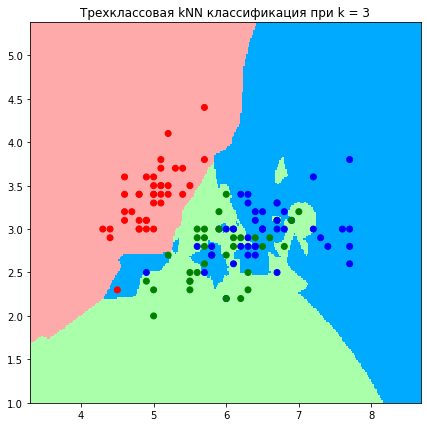

In [11]:
k = 3

y_pred = knn_w_i(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph_w_i(X_train, y_train, k)

Точность алгоритма при k = 5: 0.667


<ipython-input-9-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


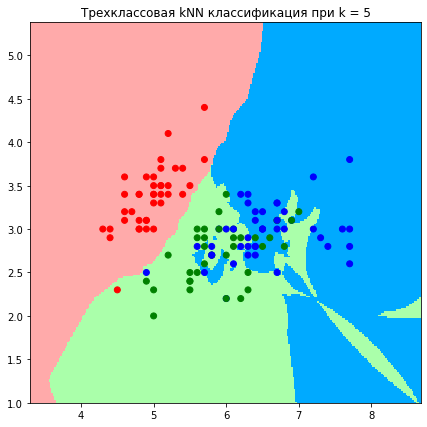

In [12]:
k = 5

y_pred = knn_w_i(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph_w_i(X_train, y_train, k)

Точность алгоритма при k = 10: 0.833


<ipython-input-9-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


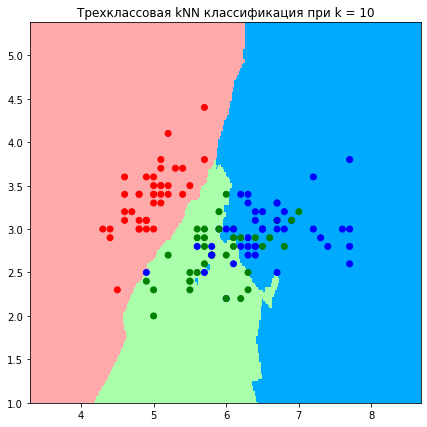

In [13]:
k = 10

y_pred = knn_w_i(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph_w_i(X_train, y_train, k)

Алгоритм, обученный с весом, зависимым от дистанции 𝑤(𝑑)=1/(𝑑+𝑎)𝑏

In [14]:
def knn_w_d(x_train, y_train, x_test, k):
    
    q = 0.5
    distance = 1
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            # + ресчет веса по принципу w(d)= 𝑤(𝑑)=𝑞**𝑑 
            w = q ** distance 
            distance = w * e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [15]:
def get_graph_w_d(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_w_d(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 3: 0.767


<ipython-input-15-ee0b6a5a5898>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


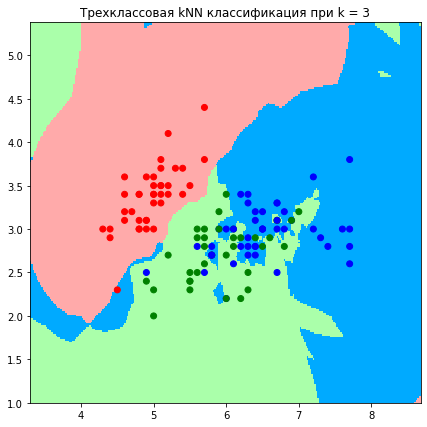

In [16]:
k = 3

y_pred = knn_w_d(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph_w_d(X_train, y_train, k)

Точность алгоритма при k = 5: 0.733


<ipython-input-15-ee0b6a5a5898>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


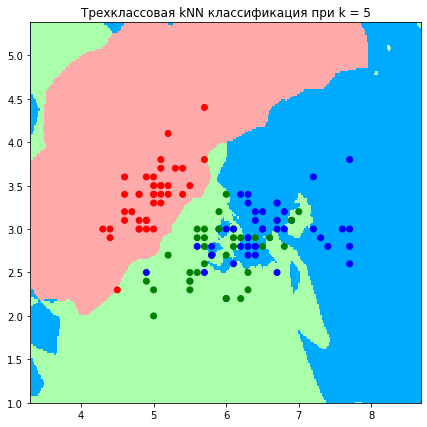

In [17]:
k = 5

y_pred = knn_w_d(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph_w_d(X_train, y_train, k)

Точность алгоритма при k = 10: 0.833


<ipython-input-15-ee0b6a5a5898>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


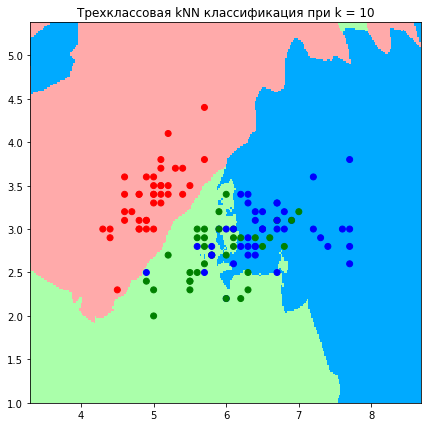

In [18]:
k = 10

y_pred = knn_w_d(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

get_graph_w_d(X_train, y_train, k)

Вывод: алгоритм с весами, взвешенными по дистанции, ведет себя лучше на K<10, чем алгоритм, взвешенный по индексу соседа. На к = 10 оба аглоритма ведут себя хорошо ( более высокий показатель accuracy). Судя по графику, какие-то выборы были обработаны на более высоких к, а какие-то, наоборот, не были обработаны из тех, которые обработаны на к=5, 3.

### Задание 4 
#### Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [19]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

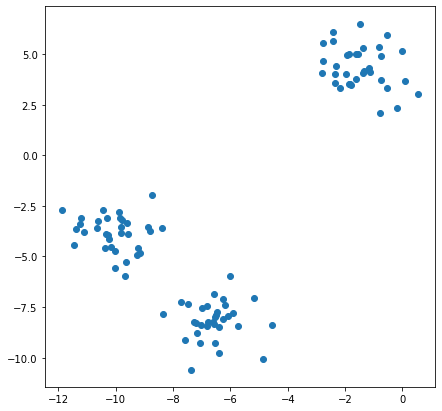

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [21]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [22]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [23]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

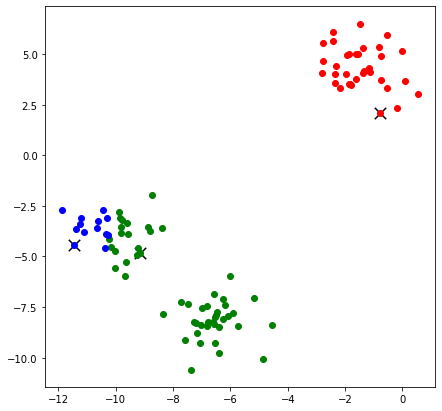

In [24]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

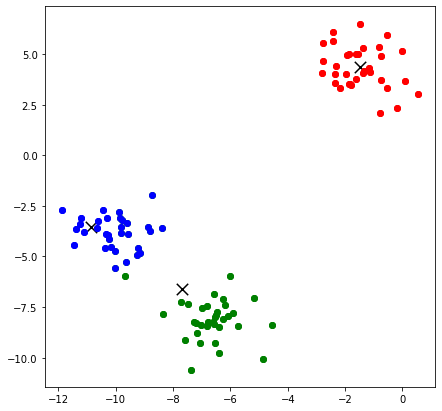

In [25]:
max_iterations = 2

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [48]:
def accuracy_metric(centroids, clusters):
    dist_mult = 0
    for i in range(len(centroids)):
        distances = e_metrics(centroids[i], clusters[i])
        dist_mult += distances ** 2
        print(dist_mult)
    return np.sqrt((dist_mult)/(len(centroids)))

In [49]:
accuracy_metric(centroids, clusters)

[50.83129019 14.26179297]
[62.87184258 34.30191425]
[109.28404915  75.43546275]


array([6.03556264, 5.01449442])

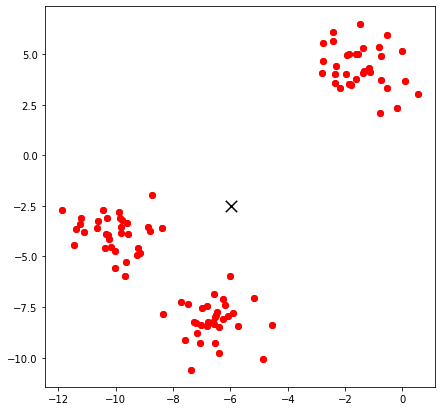

[71.27919913 70.87240589]


array([8.44270094, 8.41857505])

In [51]:
max_iterations = 10
min_distance = 1e-4
k = 1
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

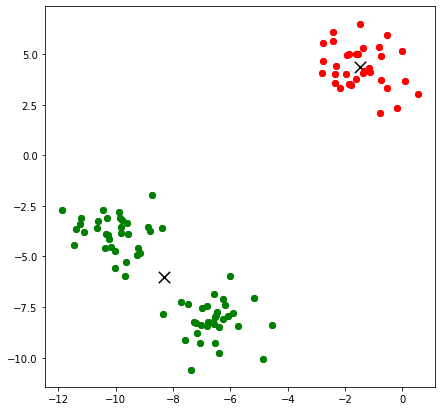

[50.83129019 14.26179297]
[80.96995252 28.9592104 ]


array([6.36278054, 3.80520764])

In [52]:
max_iterations = 10
min_distance = 1e-4
k = 2
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

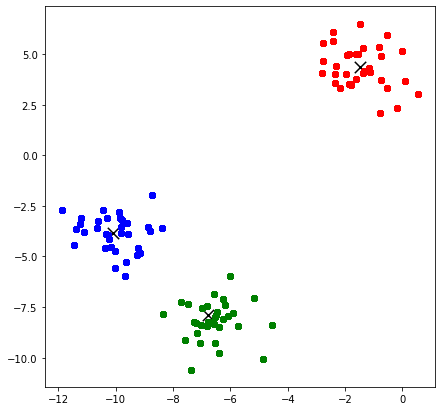

[50.83129019 14.26179297]
[59.93459215 40.3530408 ]
[104.06820319  72.06778359]


array([5.88977088, 4.90128499])

In [53]:
max_iterations = 10
min_distance = 1e-4
k = 3
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

In [55]:
max_iterations = 10
min_distance = 1e-4
k = 4
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
#visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

[50.83129019 14.26179297]
[69.39255539 17.84459246]
[127.96431067  61.89171026]
[162.77141471 105.21415244]


array([6.37909505, 5.12869751])

In [56]:
max_iterations = 10
min_distance = 1e-4
k = 5
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
#visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

[50.83129019 14.26179297]
[67.95321379 37.29980845]
[124.83555956  82.29954852]
[166.58780009 125.06653328]
[174.39221256 128.43068695]


array([5.90579736, 5.06814931])

In [57]:
max_iterations = 10
min_distance = 1e-4
k = 6
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
#visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

[50.83129019 14.26179297]
[69.04622418 38.22709061]
[126.58223607  83.70368723]
[168.53926837 126.36711105]
[181.84679052 140.00176775]
[185.16792146 141.86407088]


array([5.55529659, 4.86251085])

In [58]:
max_iterations = 10
min_distance = 1e-4
k = 7
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
#visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

[50.83129019 14.26179297]
[69.04622418 38.22709061]
[126.58223607  83.70368723]
[168.53926837 126.36711105]
[185.08525506 139.05163506]
[186.98276152 141.988996  ]
[189.8694947  144.13559041]


array([5.20809116, 4.53770852])

In [59]:
max_iterations = 10
min_distance = 1e-4
k = 8
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
#visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

[50.83129019 14.26179297]
[75.57047612 39.8717938 ]
[132.64846461  86.20362432]
[175.79883859 132.29259191]
[192.34482528 144.97711591]
[194.24233175 147.91447686]
[197.12906492 150.06107127]
[215.71242267 170.24628383]


array([5.19269225, 4.61311017])

In [60]:
max_iterations = 10
min_distance = 1e-4
k = 9
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
#visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

[23.15808623 10.88772585]
[47.89727215 36.49772669]
[104.97526064  82.82955721]
[148.12563463 128.91852479]
[164.67162132 141.6030488 ]
[166.56912778 144.54040974]
[169.45586096 146.68700415]
[188.03921871 166.87221671]
[227.6216362  220.40299688]


array([5.02904493, 4.94865859])

In [61]:
max_iterations = 10
min_distance = 1e-4
k = 10
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
#visualize(centroids, clusters)
accuracy_metric(centroids, clusters)

[9.69561271 5.47706941]
[34.43479864 31.08707025]
[91.51278713 77.41890077]
[134.66316111 123.50786835]
[151.2091478  136.19239236]
[153.10665427 139.1297533 ]
[155.99338744 141.27634771]
[174.57674519 161.46156027]
[235.4999067  220.47816843]
[278.74365667 254.85111246]


array([5.27961795, 5.04827805])

Вывод: на переходе от 2 к 3 кластерам картина значимо меняется по accuracy_metrics, но далее эта метрика (в случае, если она построена правильно) не дает веских доводов в стороны выбора какого-либо количества кластеров, так как метрика плюс минус находится вокруг показаний 5 и 5. Можно выделить 7 кластеров, где метрика получается минимальной - ([5.20809116, 4.53770852])